## Validation

In [1]:
%matplotlib inline

import validation
from statsmodels.tsa.stattools import adfuller
import pandas as pd
import numpy as np
from IPython.core.debugger import set_trace
import matplotlib.pyplot as plt
import pyflux as pf
import warnings

warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = [15,8]

In [2]:
# import sys
# !{sys.executable} -m pip install --upgrade setuptools
# !{sys.executable} -m pip install wheel
# !{sys.executable} conda install pyflux


### Input

In [3]:
data_Dir = '//farmnas/FARM2/Research/FEATURE_MODELLING/ML_BAYES/2000_2018/report_runner/FarmExperimentRunnerJob__Slow_Beta_Monthly_20D_MA_Reversion__1567553566800/Reports/R3K_2010-2018_TITO_L0_0.5_Scale-LongBeta1Mcap4_ShortBeta1Mcap4_Beta0.251/PHRA Reports/'
fileName = '20190904_115010_C2C_report_NET_Tab.csv'
Training_Period_Start = '2010-01-01'
Training_Period_End = '2015-12-31'
Validation_Period_Start = '2016-01-01'
Validation_Period_End = '2018-12-31'
performanceMeasure = 'Alpha % WITH_COST'

np.random.seed(32)

### Overview

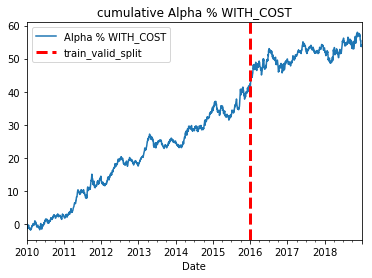

In [4]:
valid_test=validation.validation_test_overview(data_Dir,
            fileName,
            Training_Period_Start,
            Training_Period_End,
            Validation_Period_Start,
            Validation_Period_End,
            performanceMeasure)

valid_test.plot_series()

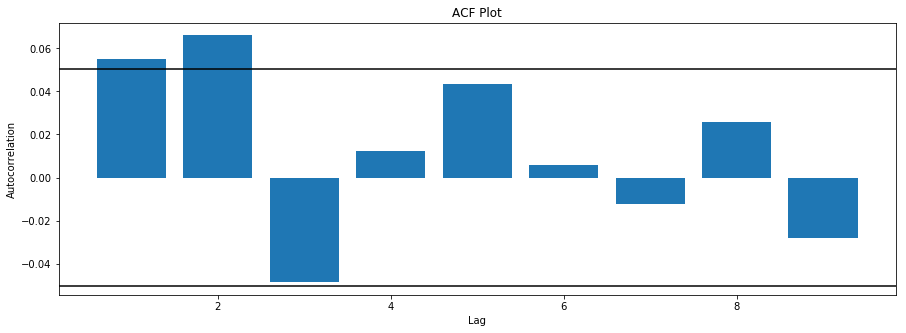

In [5]:
valid_test.plot_acf()

### Kolmogorov Smirnov two sample test

In [6]:
CI = 0.95 # confidence interval, 0-1

ks_test = validation.KSTest(CI)

ks_test.perform_test(data_Dir,
                     fileName,
                     Training_Period_Start,
                     Training_Period_End,
                     Validation_Period_Start,
                     Validation_Period_End,
                     performanceMeasure,
                     )

########################################
Approximate KS-test Values: left_hand_0.0960157865062958_RightHand_0.059474148274168914
Null Hypothesis is rejected and thus validation is not the same as training
########################################
                                        
########################################
SCIPY ks two-sided test
KS-test: KS_stat_0.0960206891480026_pValue_0.00012004281111287824


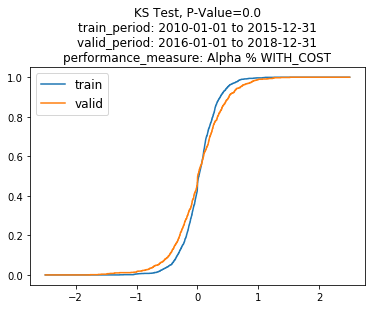

In [7]:
ks_test.plot_result()

### Bootstrapping

In [8]:
bootstrap_valid = validation.BootstrapValid ()

bootstrap_valid.simulate(data_Dir,
                         fileName,
                         Training_Period_Start,
                         Training_Period_End,
                         Validation_Period_Start,
                         Validation_Period_End,
                         performanceMeasure,
                         partition_size=5, # size of each partition
                         num_sample=500,
                         perf_metric='annualised_sharpe',
                         replacement=True)

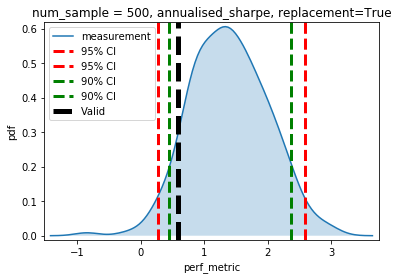

In [9]:
bootstrap_valid.plot_result()

### Generate validation report

In [10]:
%matplotlib qt
dir_out = data_Dir +'Validation_Report.xlsx'
validation.generate_validation_report(dir_out, valid_test, ks_test, bootstrap_valid)